In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

# Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Önemli

Feature = independent variables = input = estimator = attribute = (bağımsız değişken)

Target = label = dependent variable = output = hedef değişken  = (bağımlı değişken)

observation = rows = sample = gözlem 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [22]:
df.sample(5)

,total_spend,sales
28,298.8,18.9
54,307.4,20.2
168,296.6,17.1
9,223.6,10.6
36,315.7,25.4


In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


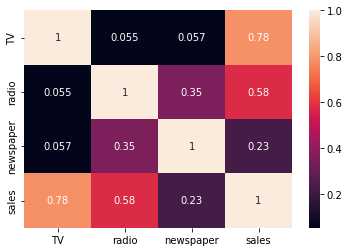

In [10]:
sns.heatmap(df.corr(), annot = True);

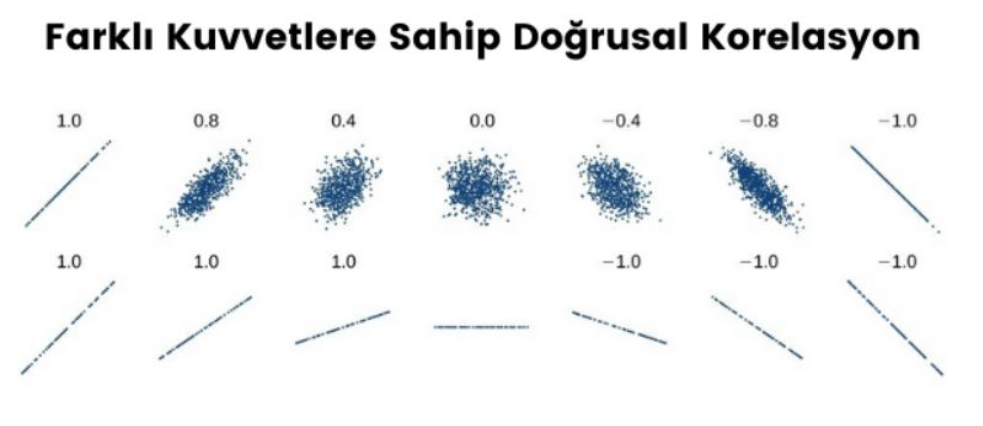

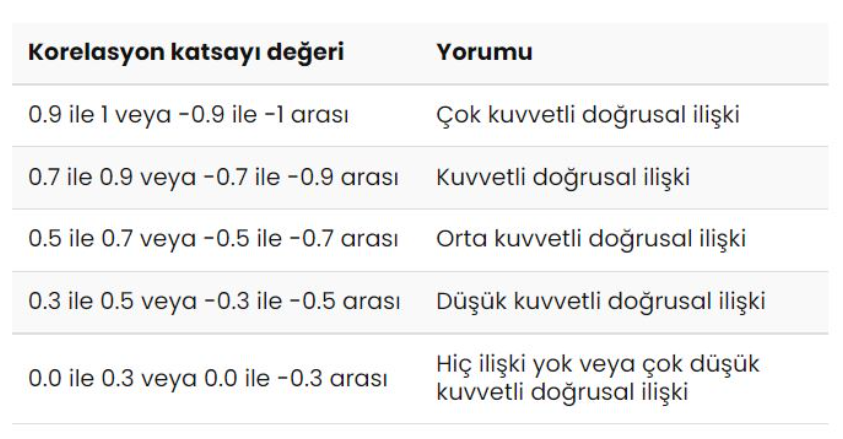

## Create new independent variable - Yeni bir feature oluşturalım feature enginnering

In [11]:
df["total_spend"] = df.TV + df.radio + df.newspaper
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [12]:
df = df.iloc[:, [0, 1, 2, 4, 3]]
df.head()

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


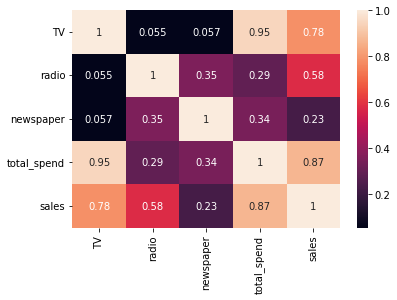

In [13]:
sns.heatmap(df.corr(), annot = True);

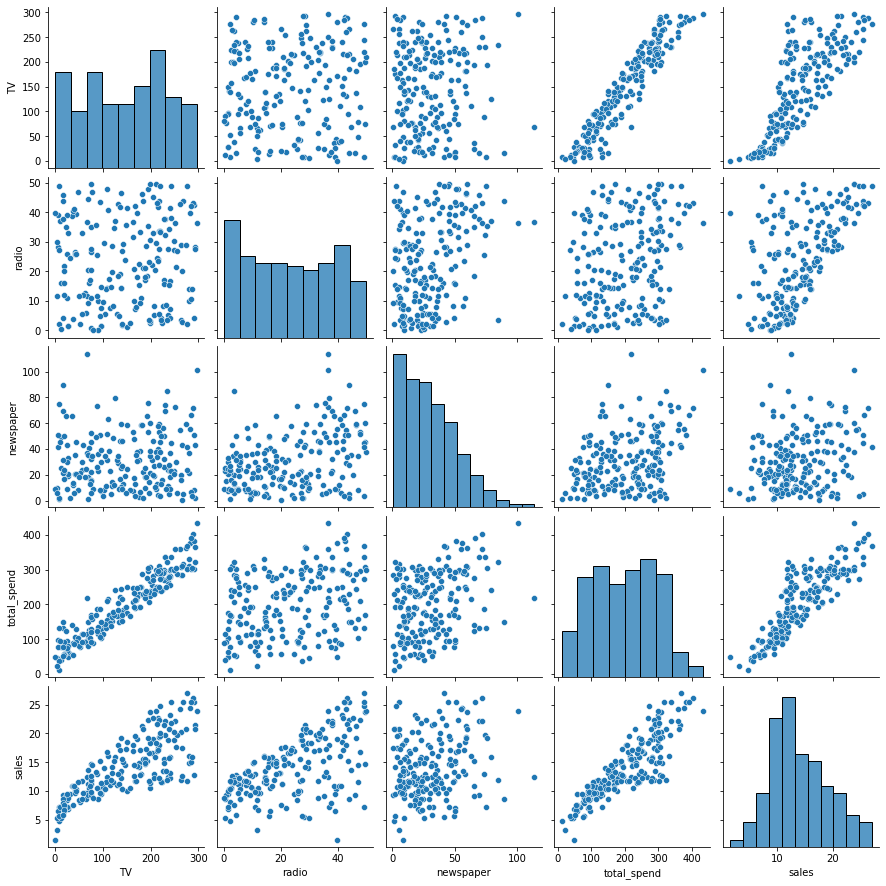

In [14]:
sns.pairplot(df);

In [15]:
import scipy.stats as stats

In [16]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:12}: {df.sales.corr(df[i])}")

corr between sales and TV          : 0.7822244248616066
corr between sales and radio       : 0.5762225745710552
corr between sales and newspaper   : 0.22829902637616534
corr between sales and total_spend : 0.8677123027017418


In [17]:
df = df[["total_spend", "sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


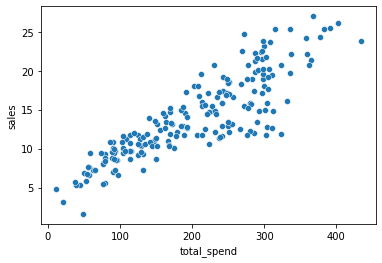

In [18]:
sns.scatterplot(x = "total_spend", y = "sales", data = df);

## Corelation between independent variable and dependent variable

In [19]:
corr = df.sales.corr(df.total_spend)
corr

0.8677123027017418

In [20]:
r2_score = corr**2
r2_score

0.7529246402599592

r2 score = 3000 / (60.000-50.000)

r2 score = 0.3

# Linear Regression

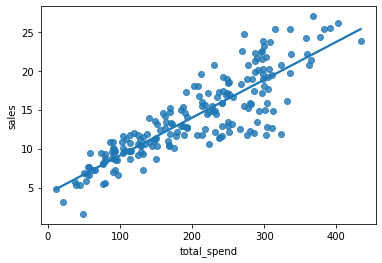

In [24]:
sns.regplot(x = "total_spend", y = "sales", data = df, ci = None);

# Spliting the dataset into X (Feature-independent variable) and y (target - dependent variable)

y  = b1 * X + b0

y  = Target = Dependent variable = bağımlı değişken 

b1 = eğim/slope/katsayı =  0 < b1 <1 and -1 < b1 <0 

X  = Feature = independent variable = bağımsız değişken

b0  = intercept = otonom parametre = başlangıç parametresi -∞ < b0 < +∞

In [25]:
X = df["total_spend"]
y = df["sales"]

In [26]:
np.polyfit(X, y, deg = 1)

array([0.04868788, 4.24302822])

## Determination of coefficents (slopes and intercept)

In [27]:
slope, intercept = np.polyfit(X, y, deg = 1)

In [28]:
print("slope      :", slope)
print("intercept  :", intercept)

slope      : 0.048687879319048145
intercept  : 4.2430282160363255


In [29]:
b1, b0 = np.polyfit(X, y, deg = 1)

In [30]:
print("b1  :", slope)
print("b0  :", intercept)

b1  : 0.048687879319048145
b0  : 4.2430282160363255


y pred formülü

y_pred = b1 * X + b0 

In [31]:
y_pred = b1 * X + b0 
y_pred

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: total_spend, Length: 200, dtype: float64

In [32]:
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


In [34]:
values = {"actual":y, "predicted":y_pred, "residual": y-y_pred, "LSE" : (y-y_pred)**2}
df_2 = pd.DataFrame(values)
df_2.head(20)

,actual,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
5,7.2,10.699041,-3.499041,12.243288
6,11.8,9.783709,2.016291,4.065430
7,13.2,11.614373,1.585627,2.514213
8,4.8,4.812676,-0.012676,0.000161
9,10.6,15.129638,-4.529638,20.517621


In [35]:
df_2.residual.sum()

8.810729923425242e-13

In [36]:
df_2.residual.sum().round()

0.0

In [37]:
df_2.LSE

0       2.085967
1       0.014136
2       1.930164
3       4.087302
4      12.355211
         ...    
195     0.416098
196     0.056469
197     0.680926
198     4.757026
199     8.914914
Name: LSE, Length: 200, dtype: float64

In [38]:
df_2.LSE.sum()

1338.4439761715594

# Prediction with simple linear regression

Task

0 ile 500 arasında 100 adet eşit aralıklarla bölünmüş bir potential_spend datası oluşturalım ve bu dataya yönelik predicton alalım.

In [39]:
potential_spend = np.linspace(0, 500, 100)
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [40]:
y_pred2 =b1*potential_spend +b0
y_pred2

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

In [41]:
b0

4.2430282160363255

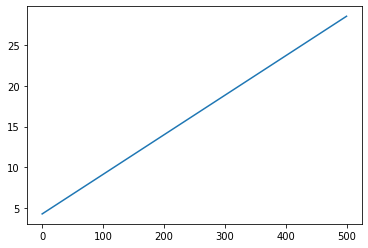

In [42]:
plt.plot(potential_spend, y_pred2);

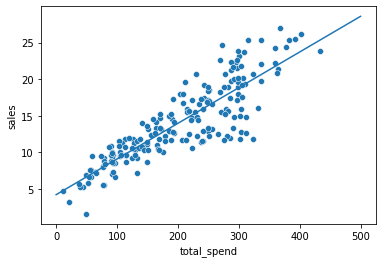

In [43]:
plt.plot(potential_spend, y_pred2)
sns.scatterplot(x = "total_spend", y = "sales", data = df);

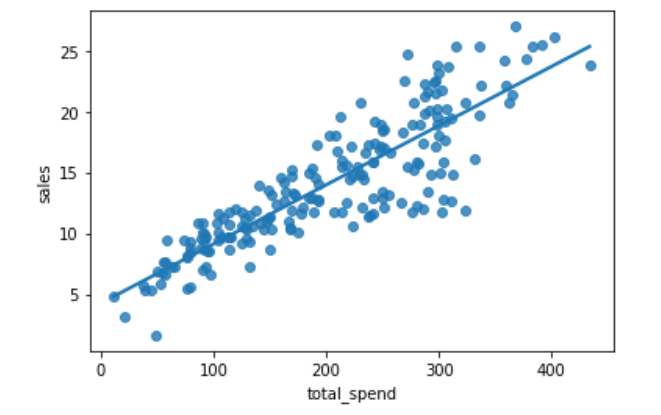

In [49]:
y_pred2 =b1*potential_spend +b0
predicted = {"predict":potential_spend, "predicted":y_pred2}
df_pred = pd.DataFrame(predicted)
df_pred.sample(50)

,predict,predicted
48,242.424242,16.046150
81,409.090909,24.160797
92,464.646465,26.865679
86,434.343434,25.390289
59,297.979798,18.751033
21,106.060606,9.406894
13,65.656566,7.439707
93,469.696970,27.111578
96,484.848485,27.849273
9,45.454545,6.456114
